In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation


# 1D Random Walk

In [2]:
N = 10**4
steps = 2*np.random.randint(0,high = 2,size = N) -1

In [3]:
position=np.cumsum(steps)
position

array([ 1,  0, -1, ..., 54, 55, 54], dtype=int32)

In [4]:
print(f'Maximum distance = {position.max()} at {position.argmax()}th step')
print(f'Minimum distance = {position.min()} at {position.argmin()}th step')

Maximum distance = 70 at 9333th step
Minimum distance = -38 at 3451th step


In [5]:
print(f' x = 20 reached at steps {np.where(position == 20)}')

 x = 20 reached at steps (array([ 163,  173,  175,  177,  185,  193,  197,  199,  205,  207, 1449,
       1451, 1453, 1455, 1457, 1469, 1553, 1563, 1565, 1569, 1581, 1583,
       1585, 1591, 1595, 1599, 1707, 1709, 1711, 1713, 1715, 1717, 1719,
       1739, 1743, 1747, 1749, 1751, 1753, 2527, 2561, 2573, 2575, 2583,
       2587, 2589, 2673, 2675, 2681, 2683, 2685, 2687, 2689, 2693, 2711,
       2713, 2715, 3157, 4577, 4579, 4581, 4583, 5209, 5215, 5243, 5245,
       5247, 5253, 5265, 5267, 5269, 5271, 5273, 5281, 5293, 7131, 7231,
       7237, 7259, 7265, 7267, 7277, 7289, 7291, 7293, 7295, 7297, 7595,
       8261, 8263, 8265, 8267, 8271, 8273, 8293, 8345, 8347, 8379, 8381,
       8383, 8385, 8387, 8393, 8395, 8397, 8399, 8403, 8405, 8407, 8409,
       8411, 8427, 8433, 8435, 8439], dtype=int64),)


In [6]:
index=np.asarray(np.linspace(0,N,N))

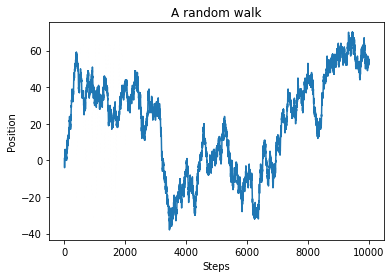

In [7]:
plt.title('A random walk')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.plot(position)
plt.show()

<IPython.core.display.Javascript object>


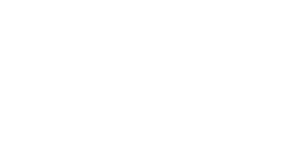

In [8]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(1.1*position.min(),1.1*position.max()))
ax.grid()
ax.set_xlabel('Steps')
ax.set_ylabel("Position")
plt.title('Animated Random Walk')

line = ax.plot(index[0], position[0], '-', lw=0.5)
def update_plots(i):
    # Draw the i-th position
    line[0].set_data(index[:i], position[:i])
    # Return a tuple
    return line[0],

anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(position)), interval=1, blit=True, repeat=True)
plt.show()

# Statistics on 1D Random Walk

In [9]:
N = 10**3
steps = 2*np.random.randint(0,high = 2,size = (N,N)) -1
steps.shape

(1000, 1000)

In [10]:
positions=np.cumsum(steps,axis=1)
positions.shape

(1000, 1000)

In [11]:
max=(positions.max(axis=1)).max()
print(f'The final position of the {(positions.max(axis=1)).argmax()}-th walker is {max}')

The final position of the 758-th walker is 121


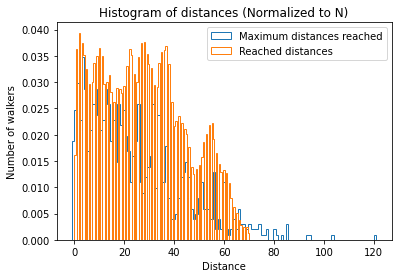

In [12]:
%matplotlib inline

n, bins, patches = plt.hist(positions.max(axis=1),bins=max,histtype = 'step', density = True, label = 'Maximum distances reached' )

n, bins, patches = plt.hist(abs(position.flatten()),bins=max,histtype = 'step', density = True, label = 'Reached distances')

plt.xlabel('Distance')
plt.ylabel('Number of walkers')
plt.title('Histogram of distances (Normalized to N)')
plt.legend()
plt.show()

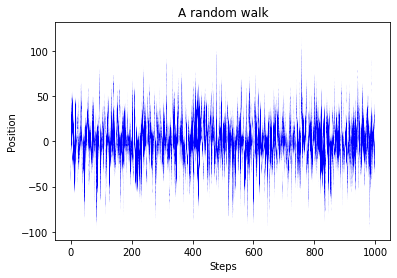

In [13]:
plt.title('A random walk')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.plot(positions, lw = 0.012,alpha = 0.08, color = 'blue')
plt.show()

<IPython.core.display.Javascript object>


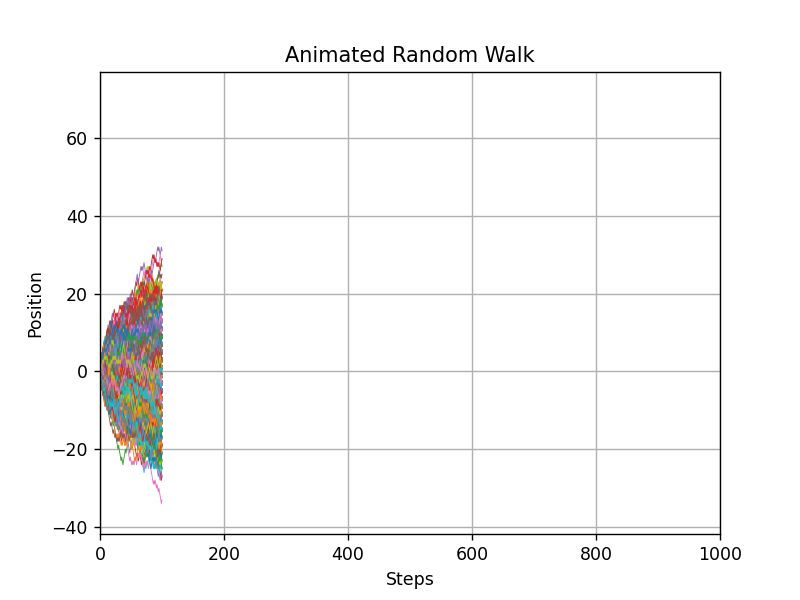

In [14]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(1.1*position.min(),1.1*position.max()))
ax.grid()
ax.set_xlabel('Steps')
ax.set_ylabel("Position")
plt.title('Animated Random Walk')


lines = [ax.plot(index[0], positions[j,0], '-', lw=0.5)[0] for j in range(N)]
def update_plots(i):
    # Draw the i-th position
    for j in range(N):
        lines[j].set_data(index[:i], positions[j,:i])
        # Return a tuple
    return lines,

anim = animation.FuncAnimation(fig, update_plots, np.arange(1, N), interval=0.5, blit=True, repeat=True)
plt.show()